In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
import os
import random
import matplotlib.pyplot as plt
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tf.config.experimental.enable_op_determinism()
tf.keras.utils.set_random_seed(42)

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

In [3]:
# def create_model_v1():
#     os.environ['PYTHONHASHSEED'] = '42'
#     random.seed(42)
#     np.random.seed(42)
#     tf.random.set_seed(42)
#     tf.config.experimental.enable_op_determinism()
#     tf.keras.utils.set_random_seed(42)
#     model = models.Sequential([
#         layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#         layers.MaxPooling2D((2, 2)),
#         layers.Flatten(),
#         layers.Dense(10)
#     ])
#     return model

# def create_model_v2():
#     os.environ['PYTHONHASHSEED'] = '42'
#     random.seed(42)
#     np.random.seed(42)
#     tf.random.set_seed(42)
#     tf.config.experimental.enable_op_determinism()
#     tf.keras.utils.set_random_seed(42)
#     model = models.Sequential([
#         layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(32, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2)),
#         layers.Flatten(),
#         layers.Dense(10)
#     ])
#     return model

# def create_model_v3():
#     os.environ['PYTHONHASHSEED'] = '42'
#     random.seed(42)
#     np.random.seed(42)
#     tf.random.set_seed(42)
#     tf.config.experimental.enable_op_determinism()
#     tf.keras.utils.set_random_seed(42)
#     model = models.Sequential([
#         layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(32, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(32, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2)),
#         layers.Flatten(),
#         layers.Dense(10)
#     ])
#     return model

In [4]:
# def create_model_v1():  
#     model = models.Sequential([
#         layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
#         layers.MaxPooling2D((2,2)),
#         layers.Flatten(),
#         layers.Dense(10)
#     ])
#     return model

# def create_model_v2():  
#     model = models.Sequential([
#         layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
#         layers.MaxPooling2D((2,2)),
#         layers.Flatten(),
#         layers.Dense(10)
#     ])
#     return model

# def create_model_v3():
#     model = models.Sequential([
#         layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
#         layers.MaxPooling2D((2,2)),
#         layers.Flatten(),
#         layers.Dense(10)
#     ])
#     return model

In [5]:
# def create_model_v1():   
#     model = models.Sequential([
#         layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
#         layers.MaxPooling2D((2,2)),
#         layers.Flatten(),
#         layers.Dense(10)
#     ])
#     return model

# def create_model_v2():   
#     model = models.Sequential([
#         layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)),
#         layers.MaxPooling2D((2,2)),
#         layers.Flatten(),
#         layers.Dense(10)
#     ])
#     return model

# def create_model_v3():  
#     model = models.Sequential([
#         layers.Conv2D(32, (7, 7), activation='relu', input_shape=(32,32,3)),
#         layers.MaxPooling2D((2,2)),
#         layers.Flatten(),
#         layers.Dense(10)
#     ])
#     return model

In [6]:
def create_model_v1():   
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(10)
    ])
    return model

def create_model_v2():  
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.AveragePooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(10)
    ])
    return model


In [7]:
def train_model(model, version):
    os.environ['PYTHONHASHSEED'] = '42'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.config.experimental.enable_op_determinism()
    tf.keras.utils.set_random_seed(42)
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    history = model.fit(
        x_train, y_train,
        epochs=20,
        validation_data=(x_val, y_val),
        batch_size=64,
        shuffle=False,
        verbose=2
    )
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Versi {version} - Akurasi Test: {test_acc:.4f}")
    return history

In [8]:
histories = []
for i, create_fn in enumerate([create_model_v1], start=1):
    os.environ['PYTHONHASHSEED'] = '42'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.config.experimental.enable_op_determinism()
    tf.keras.utils.set_random_seed(42)
    model = create_fn()
    print(f"\n--- Training Model Versi {i} ---")
    history = train_model(model, version=i)
    histories.append(history)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Training Model Versi 1 ---
Epoch 1/20
625/625 - 5s - 8ms/step - accuracy: 0.4583 - loss: 1.5462 - val_accuracy: 0.5354 - val_loss: 1.3389
Epoch 2/20
625/625 - 3s - 4ms/step - accuracy: 0.5602 - loss: 1.2644 - val_accuracy: 0.5685 - val_loss: 1.2443
Epoch 3/20
625/625 - 3s - 4ms/step - accuracy: 0.5920 - loss: 1.1766 - val_accuracy: 0.5812 - val_loss: 1.1994
Epoch 4/20
625/625 - 3s - 5ms/step - accuracy: 0.6167 - loss: 1.1121 - val_accuracy: 0.5944 - val_loss: 1.1705
Epoch 5/20
625/625 - 3s - 5ms/step - accuracy: 0.6368 - loss: 1.0606 - val_accuracy: 0.6027 - val_loss: 1.1471
Epoch 6/20
625/625 - 3s - 5ms/step - accuracy: 0.6522 - loss: 1.0176 - val_accuracy: 0.6073 - val_loss: 1.1351
Epoch 7/20
625/625 - 3s - 5ms/step - accuracy: 0.6657 - loss: 0.9803 - val_accuracy: 0.6097 - val_loss: 1.1266
Epoch 8/20
625/625 - 3s - 5ms/step - accuracy: 0.6758 - loss: 0.9479 - val_accuracy: 0.6147 - val_loss: 1.1204
Epoch 9/20
625/625 - 3s - 5ms/step - accuracy: 0.6864 - loss: 0.9188 - val_accur

In [9]:
histories2 = []
for i, create_fn in enumerate([create_model_v2], start=1):
    os.environ['PYTHONHASHSEED'] = '42'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.config.experimental.enable_op_determinism()
    tf.keras.utils.set_random_seed(42)
    model2 = create_fn()
    print(f"\n--- Training Model Versi {i} ---")
    history2 = train_model(model2, version=i)
    histories2.append(history2)


--- Training Model Versi 1 ---
Epoch 1/20
625/625 - 4s - 7ms/step - accuracy: 0.4361 - loss: 1.6154 - val_accuracy: 0.5069 - val_loss: 1.4175
Epoch 2/20
625/625 - 3s - 4ms/step - accuracy: 0.5388 - loss: 1.3263 - val_accuracy: 0.5434 - val_loss: 1.3227
Epoch 3/20
625/625 - 3s - 5ms/step - accuracy: 0.5656 - loss: 1.2521 - val_accuracy: 0.5573 - val_loss: 1.2820
Epoch 4/20
625/625 - 3s - 5ms/step - accuracy: 0.5809 - loss: 1.2072 - val_accuracy: 0.5655 - val_loss: 1.2543
Epoch 5/20
625/625 - 3s - 5ms/step - accuracy: 0.5924 - loss: 1.1711 - val_accuracy: 0.5759 - val_loss: 1.2338
Epoch 6/20
625/625 - 3s - 5ms/step - accuracy: 0.6041 - loss: 1.1397 - val_accuracy: 0.5831 - val_loss: 1.2182
Epoch 7/20
625/625 - 3s - 5ms/step - accuracy: 0.6147 - loss: 1.1118 - val_accuracy: 0.5873 - val_loss: 1.2081
Epoch 8/20
625/625 - 3s - 4ms/step - accuracy: 0.6243 - loss: 1.0865 - val_accuracy: 0.5899 - val_loss: 1.2001
Epoch 9/20
625/625 - 3s - 4ms/step - accuracy: 0.6321 - loss: 1.0647 - val_accur

In [10]:
# histories3 = []
# for i, create_fn in enumerate([create_model_v3], start=1):
#     os.environ['PYTHONHASHSEED'] = '42'
#     random.seed(42)
#     np.random.seed(42)
#     tf.random.set_seed(42)
#     tf.config.experimental.enable_op_determinism()
#     tf.keras.utils.set_random_seed(42)
#     model3 = create_fn()
#     print(f"\n--- Training Model Versi {i} ---")
#     history3 = train_model(model3, version=i)
#     histories3.append(history3)

In [11]:
def plot_training_history(histories, labels):
    plt.figure(figsize=(14, 5))

    # Plot loss
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f'{label} Train')
        plt.plot(history.history['val_loss'], linestyle='--', label=f'{label} Val')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [12]:
def plot_histories(histories, train_labels, val_labels, mode='both'):
    assert len(histories) == len(train_labels) == len(val_labels), "Lists must be the same length"
    assert mode in ('both', 'train', 'val'), "mode must be 'both', 'train' or 'val'"
    epochs = range(1, len(histories[0].history['loss']) + 1)
    plt.figure(figsize=(10, 8))
    for h, tl, vl in zip(histories, train_labels, val_labels):
        if mode in ('both', 'train'):
            plt.plot(epochs, h.history['loss'],       label=tl)
        if mode in ('both', 'val'):
            plt.plot(epochs, h.history['val_loss'], linestyle='--', label=vl)
    plt.title('Training vs. Validation Loss' if mode=='both' else
              'Training Loss' if mode=='train' else
              'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

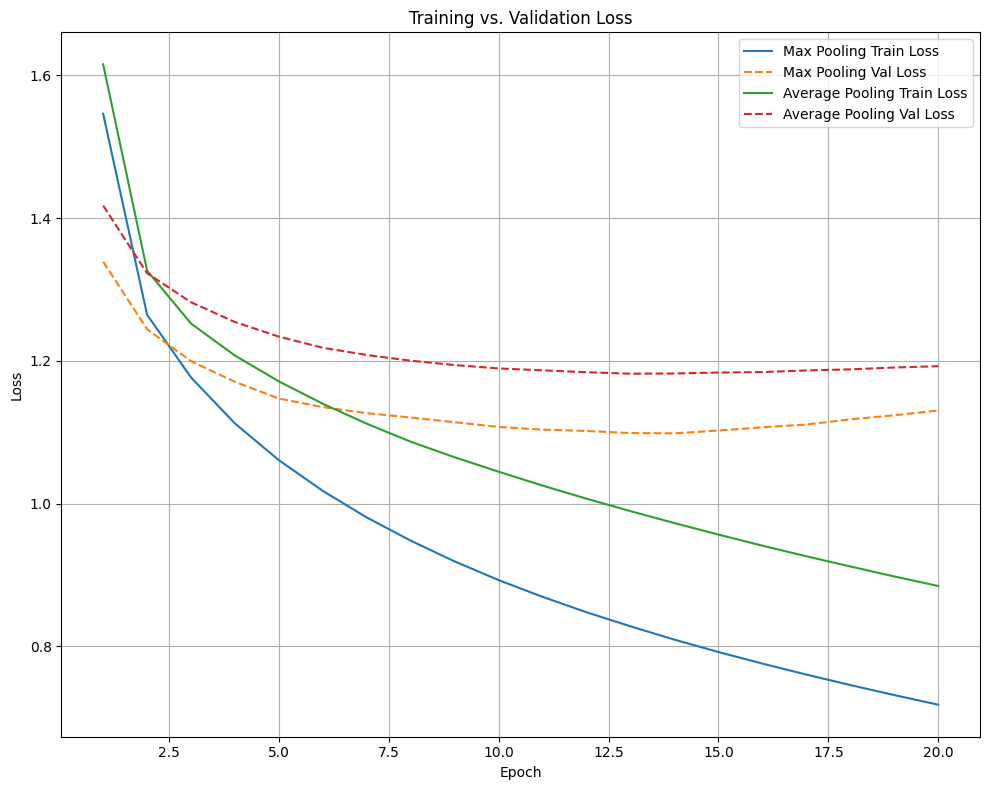

In [13]:
plot_histories(
    histories   = [history, history2],
    train_labels= ['Max Pooling Train Loss',    'Average Pooling Train Loss'],
    val_labels  = ['Max Pooling Val Loss',    'Average Pooling Val Loss'],
    mode='both'
)

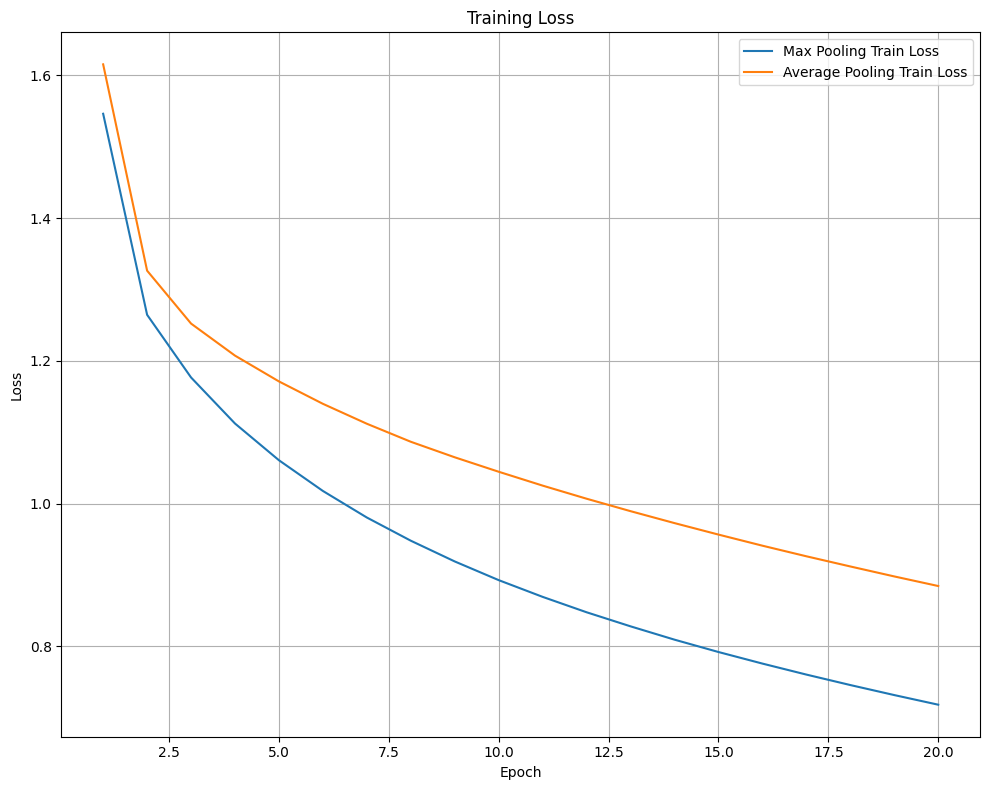

In [14]:
plot_histories(
    histories   = [history, history2],
    train_labels= ['Max Pooling Train Loss',    'Average Pooling Train Loss'],
    val_labels  = ['Max Pooling Val Loss',    'Average Pooling Val Loss'],
    mode='train'
)

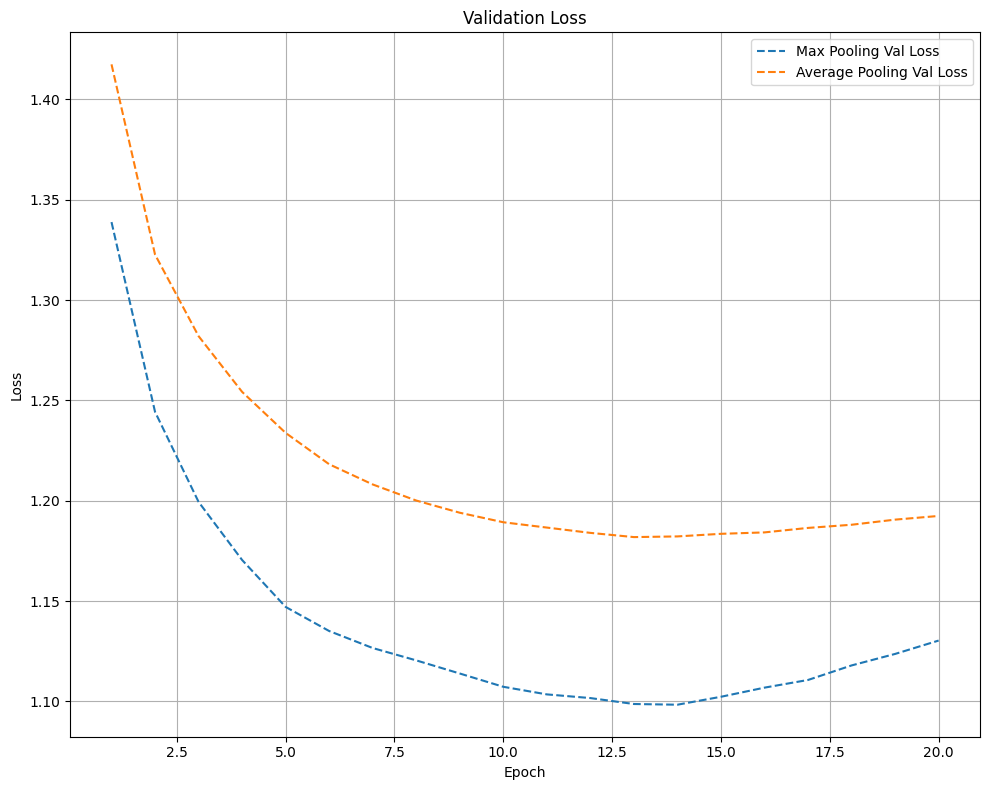

In [15]:
plot_histories(
    histories   = [history, history2],
    train_labels= ['Max Pooling Train Loss',    'Average Pooling Train Loss'],
    val_labels  = ['Max Pooling Val Loss',    'Average Pooling Val Loss'],
    mode='val'
)

In [16]:
from sklearn.metrics import f1_score
keras_preds = np.argmax(model.predict(x_test), axis=1)
print("Keras F1 Score:", f1_score(y_test, keras_preds, average='macro'))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Keras F1 Score: 0.6166319122954383


In [17]:
model.save('model1.h5')

In [18]:
from models.cnn.scratch_cnn import ScratchModel


scratch_model = ScratchModel("model1.h5")
scratch_preds = scratch_model.predict(x_test, batch_size=128)
print("Scratch F1 Score:", f1_score(y_test, keras_preds, average='macro'))


Processing batch from index 0
Processing batch from index 128
Processing batch from index 256
Processing batch from index 384
Processing batch from index 512
Processing batch from index 640
Processing batch from index 768
Processing batch from index 896
Processing batch from index 1024
Processing batch from index 1152
Processing batch from index 1280
Processing batch from index 1408
Processing batch from index 1536
Processing batch from index 1664
Processing batch from index 1792
Processing batch from index 1920
Processing batch from index 2048
Processing batch from index 2176
Processing batch from index 2304
Processing batch from index 2432
Processing batch from index 2560
Processing batch from index 2688
Processing batch from index 2816
Processing batch from index 2944
Processing batch from index 3072
Processing batch from index 3200
Processing batch from index 3328
Processing batch from index 3456
Processing batch from index 3584
Processing batch from index 3712
Processing batch fro

In [19]:
from sklearn.metrics import f1_score
keras_preds = np.argmax(model2.predict(x_test), axis=1)
print("Keras F1 Score:", f1_score(y_test, keras_preds, average='macro'))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Keras F1 Score: 0.589138218675539


In [20]:
model.save('model2.h5')

In [21]:
from models.cnn.scratch_cnn import ScratchModel


scratch_model = ScratchModel("model2.h5")
scratch_preds = scratch_model.predict(x_test, batch_size=128)

print("Scratch F1 Score:", f1_score(y_test, keras_preds, average='macro'))


Processing batch from index 0
Processing batch from index 128
Processing batch from index 256
Processing batch from index 384
Processing batch from index 512
Processing batch from index 640
Processing batch from index 768
Processing batch from index 896
Processing batch from index 1024
Processing batch from index 1152
Processing batch from index 1280
Processing batch from index 1408
Processing batch from index 1536
Processing batch from index 1664
Processing batch from index 1792
Processing batch from index 1920
Processing batch from index 2048
Processing batch from index 2176
Processing batch from index 2304
Processing batch from index 2432
Processing batch from index 2560
Processing batch from index 2688
Processing batch from index 2816
Processing batch from index 2944
Processing batch from index 3072
Processing batch from index 3200
Processing batch from index 3328
Processing batch from index 3456
Processing batch from index 3584
Processing batch from index 3712
Processing batch fro

In [22]:
# from sklearn.metrics import f1_score
# keras_preds = np.argmax(model3.predict(x_test), axis=1)
# print("Keras F1 Score:", f1_score(y_test, keras_preds, average='macro'))

In [23]:
# model.save('model3.h5')

In [24]:
# from models.cnn.scratch_cnn import ScratchModel


# scratch_model = ScratchModel("model3.h5")
# scratch_preds = scratch_model.predict(x_test, batch_size=128)
# print("Scratch F1 Score:", f1_score(y_test, keras_preds, average='macro'))
